In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
from scipy import stats, integrate
import pickle

In [3]:
length_regress_data = pickle.load(open('move_lvl_regress_len.p', 'r'))
move_str_ls = [key for vals in length_regress_data.values() for key in vals]

#for key, val in length_regress_data.iteritems():
#    for inner_key, inner_val in val.iteritems():
#        print inner_key
#        print inner_val

id_lvl_ls = [(inner_key, inner_val[1]) 
             for _, val in length_regress_data.iteritems() 
             for inner_key, inner_val in val.iteritems()]


    
print len(move_str_ls)

print len(set(move_str_ls))

690
142


In [4]:
def get_move_len(key_str):
    move_range = eval(key_str[key_str.find('('):key_str.find(')')+1])
    return move_range[1] - move_range[0]

def success_map(lvl_str):
    if lvl_str == 'correct':
        return 1
    if lvl_str == 'not_moved':
        return 0
    if lvl_str == 'incorrect':
        return -1
    return 'undefined'

[(59, 5), (57, 4), (149, 3), (20, 2), (23, 2), (24, 2), (27, 2), (37, 2), (42, 2), (43, 2), (46, 2), (48, 2), (67, 2), (68, 2), (69, 2), (115, 2), (107, 2), (161, 2), (175, 2), (185, 2), (382, 2), (15, 1), (16, 1), (17, 1), (21, 1), (26, 1), (28, 1), (29, 1), (31, 1), (32, 1), (33, 1), (36, 1), (39, 1), (41, 1), (44, 1), (47, 1), (49, 1), (50, 1), (51, 1), (60, 1), (61, 1), (62, 1), (64, 1), (71, 1), (72, 1), (586, 1), (81, 1), (1620, 1), (86, 1), (89, 1), (90, 1), (93, 1), (94, 1), (95, 1), (96, 1), (99, 1), (106, 1), (619, 1), (108, 1), (111, 1), (119, 1), (122, 1), (130, 1), (131, 1), (132, 1), (133, 1), (134, 1), (135, 1), (136, 1), (657, 1), (153, 1), (158, 1), (160, 1), (165, 1), (166, 1), (170, 1), (177, 1), (189, 1), (190, 1), (191, 1), (196, 1), (199, 1), (206, 1), (210, 1), (211, 1), (219, 1), (225, 1), (536, 1), (749, 1), (243, 1), (247, 1), (248, 1), (260, 1), (261, 1), (264, 1), (272, 1), (277, 1), (291, 1), (297, 1), (323, 1), (328, 1), (343, 1), (357, 1), (365, 1), (377,

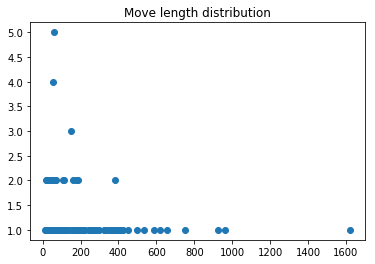

In [5]:
lens = [get_move_len(move_str) for move_str in set(move_str_ls)]

#lens = [l for l in lens if l < 500]

len_counts = Counter(lens)

print len_counts.most_common()
print
print sorted(len_counts.most_common())


xs, ys = list(zip(*sorted(len_counts.iteritems())))

plt.plot(xs, ys, 'o')
plt.title('Move length distribution')
plt.show()

In [6]:
n = len(lens)
mean_len, len_sd = np.mean(lens), np.var(lens)**0.5

print 'Mean:', mean_len, '\tSD:', len_sd, '\n'

short = [(key, val) for key, val in len_counts.most_common() if key < mean_len - len_sd/float(2)]

print 'Short:', mean_len - len_sd/float(2), '\tProportion:', len(short)/float(n), '\n'

print '#len > 1:', [(key, val) for key, val in len_counts.most_common() if val > 1], '\n'

print 'H(lens):', -sum([float(c)/n * np.log(float(c)/n) for c in len_counts.values()]), '\tmax H(lens):', np.log(n)

Mean: 177.330985915 	SD: 209.52423376 

Short: 72.5688690354 	Proportion: 0.267605633803 

#len > 1: [(59, 5), (57, 4), (149, 3), (20, 2), (23, 2), (24, 2), (27, 2), (37, 2), (42, 2), (43, 2), (46, 2), (48, 2), (67, 2), (68, 2), (69, 2), (115, 2), (107, 2), (161, 2), (175, 2), (185, 2), (382, 2)] 

H(lens): 4.66116859019 	max H(lens): 4.9558270576


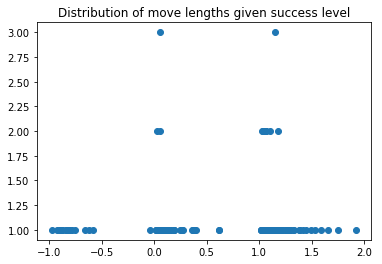

In [7]:
# joint
len_lvl_ls = [(get_move_len(move_str), success_map(lvl_str)) for move_str, lvl_str in set(id_lvl_ls)]

len_max = 1000

len_lvl_merge = [move_len/float(len_max)+ lvl for move_len, lvl in len_lvl_ls]

len_lvl_merged_counts = Counter(len_lvl_merge)

xs, ys = list(zip(*sorted(len_lvl_merged_counts.iteritems())))

plt.plot(xs, ys, 'o')
plt.title('Distribution of move lengths given success level')
plt.show()

lvl =  -1 #lens  16
mean len  188.25 median len  168.0 	SD len 107.153219737
lvl =  0 #lens  45
mean len  132.177777778 median len  69.0 	SD len 132.898338571
lvl =  1 #lens  78
mean len  163.038461538 median len  117.0 	SD len 155.843152767


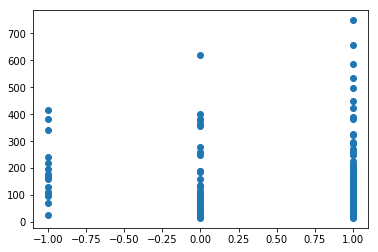

In [8]:
len_lvl_counts = Counter(len_lvl_ls)

filtered_len_lvl_ls = [tup for tup in len_lvl_ls if tup[0] < 800]

temp_lvl_dict = defaultdict(list)

for mv_l, lvl in filtered_len_lvl_ls:
    temp_lvl_dict[lvl].append(mv_l)
    
for key, val in sorted(temp_lvl_dict.iteritems()):
    print 'lvl = ', key, '#lens ', len(val)
    print 'mean len ', np.mean(val), 'median len ', np.median(val), '\tSD len', np.var(val)**0.5
    
ys, xs = list(zip(*sorted(filtered_len_lvl_ls, key=lambda tup: tup[0])))

plt.plot(xs, ys, 'o')
plt.title('')
plt.show()

In [9]:
# correlation
n = len(filtered_len_lvl_ls)
xs, ys = list(zip(*filtered_len_lvl_ls))

print stats.pearsonr(xs, ys)

len_counts = Counter(xs)
lvl_counts = Counter(ys)
joint_counts = Counter(filtered_len_lvl_ls)

H_lens = -sum([float(c)/n * np.log(float(c)/n) for c in len_counts.values()])
H_lvls = -sum([float(c)/n * np.log(float(c)/n) for c in lvl_counts.values()])
H_joint = -sum([float(c)/n * np.log(float(c)/n) for c in joint_counts.values()])

print H_lens, H_lvls, H_joint
print 'dependence: ', (H_lens + H_lvls - H_joint)/H_joint

(0.0025957222827246362, 0.97580641459508877)
4.63345593045 0.938182421783 4.77734507195
dependence:  0.166262488541


In [16]:
# groups: {short, long} x {correct, incorrect, not_moved}

mean_len, len_sd = np.mean(lens), np.var(lens)**0.5

is_short = lambda l: 1 if l <= mean_len - len_sd/float(2) else 0

groups = [(is_short(l), lvl) for l, lvl in filtered_len_lvl_ls]

print Counter(groups)

len_cats, lvl_cats = list(zip(*groups))

print stats.pearsonr(len_cats, lvl_cats)

n = len(len_cats)
len_cat_counts = Counter(len_cats)
joint_cat_counts = Counter(groups)

H_len_cats = -sum([float(c)/n * np.log(float(c)/n) for c in len_cat_counts.values()])
H_joint_cats = -sum([float(c)/n * np.log(float(c)/n) for c in joint_cat_counts.values()])
print H_len_cats/np.log(len(len_cat_counts)),\
        H_lvls/np.log(len(lvl_counts)), \
        H_joint_cats/np.log(len(joint_cat_counts))
print 'dependence: ', (H_len_cats + H_lvls - H_joint_cats)/H_joint_cats

by_len_cat = [[joint_cat_counts[(l_cat, lvl)] for lvl in [-1, 0, 1]] for l_cat in [0, 1]]
by_lvl_cat = [[joint_cat_counts[(l_cat, lvl)] for l_cat in [0, 1]] for lvl in [-1, 0, 1]]

accum = 0

print '\n\n0\t1'
print '----------'
for lvl_cat in [-1, 0, 1]:
    for len_cat in [0, 1]:
        cur_p = round(joint_cat_counts[(len_cat, lvl_cat)]/float(n), 3)
        accum += cur_p
        print cur_p, '\t',
    print
    
print 'len cat counts ', [sum(lvl_counts) for lvl_counts in by_len_cat]
print 'lvl cat counts ', [sum(len_counts) for len_counts in by_lvl_cat]

print '', stats.chi2_contingency(by_len_cat)

Counter({(0, 1): 46, (1, 1): 32, (1, 0): 23, (0, 0): 22, (0, -1): 14, (1, -1): 2})
(0.096872431947153309, 0.2565991103453385)
0.976538229658 0.853970442039 0.885020616181
dependence:  0.0184916806183


0	1
----------
0.101 	0.014 	
0.158 	0.165 	
0.331 	0.23 	
len cat counts  [82, 57]
lvl cat counts  [16, 45, 78]
 (7.2739388470133006, 0.026332024380016347, 2, array([[  9.43884892,  26.54676259,  46.01438849],
       [  6.56115108,  18.45323741,  31.98561151]]))


In [ ]:
# bayes factor for contigency table

# M1 = P(k=k') = 1/|k| -> independent
# M2 = P(k=k') = q_k' with q ~ Dir(1) 

In [17]:
# groups: {short, long} x {correct, incorrect, not_moved}

mean_len, len_sd = np.mean(lens), np.var(lens)**0.5

is_short = lambda l: 1 if l <= mean_len - len_sd/float(2) else 0

groups = [(is_short(l), 0 if lvl == -1 or lvl == 0 else 1) for l, lvl in filtered_len_lvl_ls]

print Counter(groups)

len_cats, lvl_cats = list(zip(*groups))

print stats.pearsonr(len_cats, lvl_cats)

n = len(len_cats)
len_cat_counts = Counter(len_cats)
joint_cat_counts = Counter(groups)

H_len_cats = -sum([float(c)/n * np.log(float(c)/n) for c in len_cat_counts.values()])
H_joint_cats = -sum([float(c)/n * np.log(float(c)/n) for c in joint_cat_counts.values()])
print H_len_cats/np.log(len(len_cat_counts)),\
        H_lvls/np.log(len(lvl_counts)), \
        H_joint_cats/np.log(len(joint_cat_counts))
print 'dependence: ', (H_len_cats + H_lvls - H_joint_cats)/H_joint_cats

by_len_cat = [[joint_cat_counts[(l_cat, lvl)] for lvl in [0, 1]] for l_cat in [0, 1]]
by_lvl_cat = [[joint_cat_counts[(l_cat, lvl)] for l_cat in [0, 1]] for lvl in [0, 1]]

accum = 0

print '\n\n0\t1'
print '----------'
for lvl_cat in [0, 1]:
    for len_cat in [0, 1]:
        cur_p = round(joint_cat_counts[(len_cat, lvl_cat)]/float(n), 3)
        accum += cur_p
        print cur_p, '\t',
    print
    
print 'len cat counts ', [sum(lvl_counts) for lvl_counts in by_len_cat]
print 'lvl cat counts ', [sum(len_counts) for len_counts in by_lvl_cat]

print '', stats.chi2_contingency(by_len_cat)

Counter({(0, 1): 46, (0, 0): 36, (1, 1): 32, (1, 0): 25})
(0.00042410502945838341, 0.99604652033738006)
0.976538229658 0.853970442039 0.982860627099
dependence:  0.185340674339


0	1
----------
0.259 	0.18 	
0.331 	0.23 	
len cat counts  [82, 57]
lvl cat counts  [61, 78]
 (0.02847798127712458, 0.86598998171333419, 1, array([[ 35.98561151,  46.01438849],
       [ 25.01438849,  31.98561151]]))


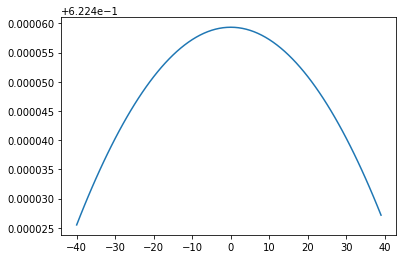

In [142]:
b_0 = 0.5
b_1 = -0.00000009
b_2 = -0.05 
b_3 = 0.9
sigmoid = lambda x: float(1)/(1 + np.exp(-(b_0 + b_1*x**2)))

xs = list(range(-40, 40))

ys = map(sigmoid, xs)

plt.plot(xs, ys)

plt.show()